## Design Backward Induction for the Simplified Soccer Case

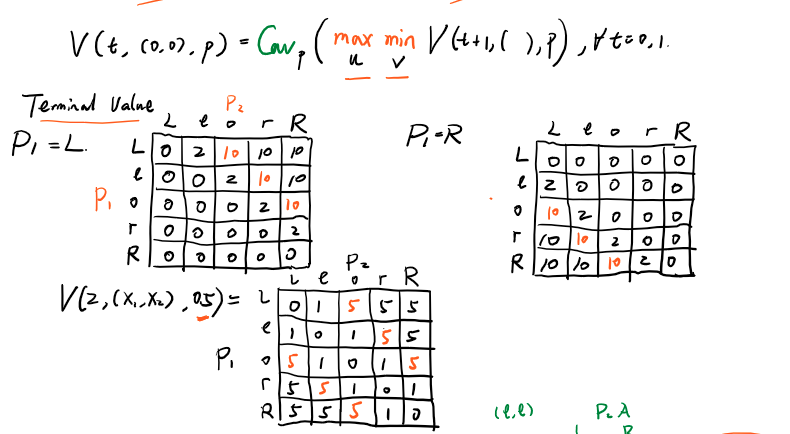

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In /home/doi5/anaconda3/envs/siren/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/doi5/anaconda3/envs/siren/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/doi5/anaconda3/envs/siren/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/doi5/anaconda3/envs/siren/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/doi5/anaconda3/envs/siren/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and w

In [3]:
# Helper function to print the payoff table
def printMatrix(s):

    # Do heading
    print("     ", end="")
    for j in range(len(s[0])):
        print("%5s " % j, end="")
    print()
    print("     ", end="")
    for j in range(len(s[0])):
        print("------", end="")
    print()
    # Matrix contents
    for i in range(len(s)):
        print("%3s |" % (i), end="") # Row nums
        for j in range(len(s[0])):
            print("%5s " % (s[i][j]), end="")
        print()

In [4]:
# states, types, and actions
states = ['L', 'l', 'O', 'r', 'R']
types = ['L', 'R']
actions = ['L', 'R']

In [5]:
# final value for type R
val_L_T = np.zeros((len(states), len(states)))
val_L_T[np.triu_indices(5, k=1)] = 2
val_L_T[np.triu_indices(5, k=2)] = 10

# final value for type L
val_R_T = val_L_T.T

In [6]:
# get some numbers for easier calculations
import itertools

a_pairs = itertools.product(states, repeat=2)
a_pairs = np.array(list(a_pairs))    

In [7]:
a_pairs = np.array([[''.join(a_pairs[i, :]) for i in range(len(a_pairs))]]) # make array of action pairs

In [8]:
a_pairs = a_pairs.reshape(5, 5)

## Define a function to get value at some time t and probability p

In [ ]:
def get_av_val(val_a, val_b, p):
    return p*val_b + (1-p)*val_a

In [ ]:
def get_prev_val(game_dict, s): # game dict maps states --> payoff | s - states in grid
    temp = np.full(s.shape, np.nan)
    action = np.full(s.shape, '%', dtype=str)
    a_map = {'0': 'L', '1': 'R'}
    for i in range(1, 4):
        payoff = np.zeros((2, 2)) # payoff matrix for the game
        payoff[0, 0] = game_dict[s[0, i-1]] # left left 
        payoff[1, 0] = game_dict[s[4, i-1]] # right left
        payoff[0, 1] = game_dict[s[0, i+1]] # left right
        payoff[1, 1] = game_dict[s[4, i+1]] # right right
        
        # now find maximin
        temp[1, i] = np.max(np.min(payoff, 1))
        action_idx = np.where(np.min(payoff, 1) == np.max(np.min(payoff, 1)))[0]
        action[1, i] = a_map[str(action_idx[0])] if len(action_idx) == 1 else 'A'
    
    temp[2:4, 1:4] = temp[1, 1:4] # symmetric 
    action[2:4, 1:4] = action[1, 1:4]
    
    
    return temp, action

In [ ]:
def get_ini_val(game_dict, s):
    temp = np.full(s.shape, np.nan)
    action = np.full(s.shape, '%', dtype=str)
    a_map = {'0': 'L', '1': 'R'}
    # for the initial time only one state (0, 0) is possible
    i = 2
    payoff = np.zeros((2, 2))
    payoff[0, 0] = game_dict[s[i-1, i-1]] # left left 
    payoff[1, 0] = game_dict[s[i+1, i-1]] # right left
    payoff[0, 1] = game_dict[s[i-1, i+1]] # left right
    payoff[1, 1] = game_dict[s[i+1, i+1]] # right right
    
    # now find maximin
    temp[2, 2] = np.max(np.min(payoff, 1))
    action_idx = np.where(np.min(payoff, 1) == np.max(np.min(payoff, 1)))[0]
    action[2, 2] = a_map[str(action_idx[0])] if len(action_idx) == 1 else 'A'
    
    
    return temp, action

In [ ]:
# try manually for T-1 stage
av_game = get_av_val(val_R_T, val_L_T, 0.5)  # value of average game at time T
av_game_dict = dict(zip(list(a_pairs.flatten()), list(av_game.flatten())))

In [ ]:
printMatrix(av_game)

In [ ]:
val_1, strategy = get_prev_val(av_game_dict, a_pairs)

In [ ]:
printMatrix(val_1)

In [ ]:
printMatrix(strategy)

In [ ]:
inter_game_dict = dict(zip(list(a_pairs.flatten()), list(val_1.flatten())))
ini_val, ini_sigma = get_ini_val(inter_game_dict, a_pairs)

In [ ]:
printMatrix(ini_val)

In [ ]:
printMatrix(ini_sigma)

In [ ]:
ps = np.linspace(0, 1, 100)
l = [] # state l for p2 
O = [] # state O for p2
r = [] # state r for P2
for p in ps:
    av_game = get_av_val(val_R_T, val_L_T, p)
    av_dict = dict(zip(list(a_pairs.flatten()), list(av_game.flatten())))
    val_0, _ = get_prev_val(av_dict, a_pairs)
    l.append(val_0[1, 1])
    O.append(val_0[1, 2])
    r.append(val_0[1, 3])

In [ ]:
plt.plot(ps, l, label="l")
plt.plot(ps, O, label="O")
plt.plot(ps, r, label="r")
plt.xlabel('p')
plt.ylabel('V')
plt.title("Value at T=1")
plt.hlines(y=O[0], xmin=ps[0], xmax=ps[-1], color='red', linestyles='dashed', label="cav(u)")
plt.legend()

## Get value at initial time step for all Ps (a.k.a. Value of the Game)

In [ ]:
ps = np.linspace(0, 1, 1000)
vals = []
actions = []
for p in ps:
    av_game = get_av_val(val_R_T, val_L_T, p)  # value of average game at time T
    av_game_dict = dict(zip(list(a_pairs.flatten()), list(av_game.flatten())))
    val_1, _ = get_prev_val(av_game_dict, a_pairs)
    inter_game = dict(zip(list(a_pairs.flatten()), list(val_1.flatten())))
    val_0, s = get_ini_val(inter_game, a_pairs)
    vals.append(val_0[2, 2]) # initial stage has value at (0, 0) only 
    actions.append(s[2, 2])

In [ ]:
plt.plot(ps, vals)
plt.title('Value of the Non-Revealing Game u(p)')
plt.xlabel('p')
plt.ylabel('u (p)')

## Now lets look at P2's Value

In [9]:
def get_prev_val_2(game_dict, s):  # game dict maps states --> payoff | s - states in grid
    temp = np.full(s.shape, np.nan)
    for i in range(1, 4):
        payoff = np.zeros((2, 2))  # payoff matrix for the game
        payoff[0, 0] = game_dict[s[0, i - 1]]  # left left
        payoff[1, 0] = game_dict[s[4, i - 1]]  # right left
        payoff[0, 1] = game_dict[s[0, i + 1]]  # left right
        payoff[1, 1] = game_dict[s[4, i + 1]]  # right right

        # now find maximin
        temp[1, i] = np.max(np.min(payoff, 0))

    temp[2:4, 1:4] = temp[1, 1:4]  # symmetric

    return temp

In [10]:
# the dual

# for 0<=x<=0.5 u(p) = 10x 
# for 0.5>=x>=1 u(p) = 10 (1-x)
def get_up(p):
    if p <= 0.5:
        return 10*p 
    else:
        return 10*(1-p)

# def factor(p):
#     return (1-p)/p

In [102]:
def plot_phat(p): # p is the game defined by nature's probability
    ps_hat = np.linspace(-15, 15, 101)
    
    val_2_p_t1 = np.zeros((ps_hat.shape[0], a_pairs.shape[0], a_pairs.shape[1]))
    
    eps = 1e-9

    for i in range(len(ps_hat)):
        u = get_up(p)
        p2_hat = (u-p*ps_hat[i])/(1-p + eps*(p==1))  # prevent divide by 0
        min_game = np.minimum(ps_hat[i] - val_L_T, p2_hat - val_R_T)
        min_game_dict = dict(zip(list(a_pairs.flatten()), list(min_game.flatten())))
        val_2_p_t1[i] = get_prev_val_2(min_game_dict, a_pairs)

    val_2_p_t0 = np.zeros((ps_hat.shape[0], 2, 2))

    for i in range(val_2_p_t0.shape[1]):
        for j in range(val_2_p_t0.shape[2]):
            val_2_p_t0[:, i, j] = val_2_p_t1[:, 2*i+1, 2*j+1]

    payoff_t0 = np.zeros(ps_hat.shape[0])
    strategy_t0 = list()

    for i in range(val_2_p_t0.shape[0]):
        payoff_t0[i] = np.max(np.min(val_2_p_t0[i, :, :], 0))
        strategy_t0.append(actions[np.argmax(np.min(val_2_p_t0[i, :, :], 0))])
    
    plt.plot(ps_hat, payoff_t0, label="u")
    # plt.hlines(y=0, xmin=ps_hat[0], xmax=ps_hat[-1], color='red', linestyles='dashed', label="cav(u)")
    plt.vlines(x=10, ymin=np.min(payoff_t0), ymax=np.max(payoff_t0), linestyles='dashed', color='gray')
    plt.vlines(x=-10, ymin=np.min(payoff_t0), ymax=np.max(payoff_t0), linestyles='dashed', color='gray')
    plt.vlines(x=0, ymin=np.min(payoff_t0), ymax=np.max(payoff_t0), linestyles='dashed', color='gray')
    plt.legend(loc='best')
    plt.xlabel('p_hat')
    plt.ylabel('V')
    plt.title(f"Value at T0 for game with p = {p}")
    
    s_idx = np.where(payoff_t0 == np.max(payoff_t0))
    s_idx = [i for i in s_idx[0]]
    s_keys = [strategy_t0[i] for i in s_idx]
    s = {key: None for key in s_keys}
    if len(s) > 1: 
        s = {'A': None}
    print(f"Strategy at t=0 for P2 is: {list(s.keys())[0]}")
    return payoff_t0, strategy_t0

Strategy at t=0 for P2 is: R


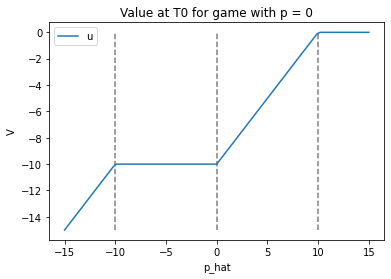

In [103]:
p0, s0 = plot_phat(0)

Strategy at t=0 for P2 is: R


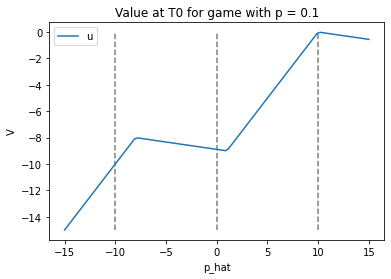

In [104]:
p01, s01 = plot_phat(0.1)

Strategy at t=0 for P2 is: R


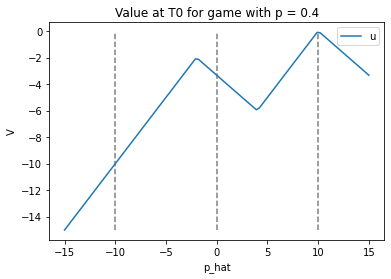

In [105]:
p04, s04 = plot_phat(0.4)

Strategy at t=0 for P2 is: L


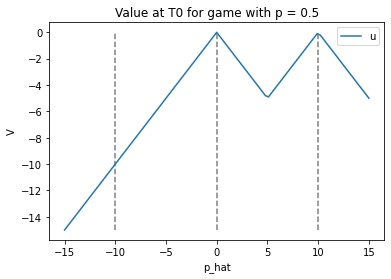

In [106]:
p05, s05 = plot_phat(0.5)

Strategy at t=0 for P2 is: L


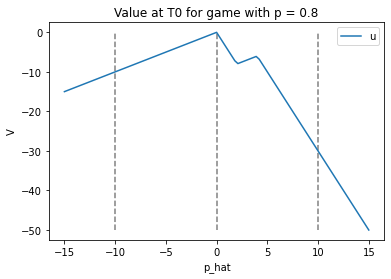

In [107]:
p08, s08 = plot_phat(0.8)

Strategy at t=0 for P2 is: L


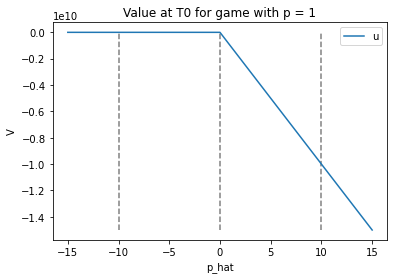

In [108]:
p1, s1 = plot_phat(1)

In [ ]:
p = 0.5
p_hat = 10
u = get_up(p)
eps = 1e-9
p2_hat = (u-p*p_hat)/(1-p + eps*(p==1))  # prevent divide by 0
min_game = np.minimum(p_hat - val_L_T, p2_hat - val_R_T)
min_game_dict = dict(zip(list(a_pairs.flatten()), list(min_game.flatten())))

val_2 = get_prev_val_2(min_game_dict, a_pairs)

printMatrix(min_game)
print('\n')
printMatrix(val_2)

## P2's strategy 

In [ ]:
ps_hat = np.linspace(-20, 20, 101)
val_2_p_t1 = np.zeros((ps_hat.shape[0], a_pairs.shape[0], a_pairs.shape[1]))

for i in range(len(ps_hat)):
    min_game = np.minimum(ps_hat[i] - val_L_T, (10 - ps_hat[i])/3 - val_R_T)
    min_game_dict = dict(zip(list(a_pairs.flatten()), list(min_game.flatten())))
    val_2_p_t1[i] = get_prev_val_2(min_game_dict, a_pairs)

val_2_p_t0 = np.zeros((ps_hat.shape[0], 2, 2))

for i in range(val_2_p_t0.shape[1]):
    for j in range(val_2_p_t0.shape[2]):
        val_2_p_t0[:, i, j] = val_2_p_t1[:, 2*i+1, 2*j+1]

payoff_t0 = np.zeros(ps_hat.shape[0])
strategy_t0 = list()

for i in range(val_2_p_t0.shape[0]):
    payoff_t0[i] = np.max(np.min(val_2_p_t0[i, :, :], 0))
    strategy_t0.append(actions[np.argmax(np.min(val_2_p_t0[i, :, :], 0))])

In [ ]:
len(strategy_t0)

In [ ]:
plt.plot(ps_hat, payoff_t0, label="u")
# plt.hlines(y=0, xmin=ps_hat[0], xmax=ps_hat[-1], color='red', linestyles='dashed', label="cav(u)")
plt.legend(loc='right')
plt.xlabel('p')
plt.ylabel('V')
plt.title("Value at T0")

## Now let's consider a "larger" game

In [ ]:
num_states = 15
s = np.linspace(1, num_states, num_states)
states = list(itertools.product(s, repeat=2)) # center is (8, 8) ---> (7, 7) indices

In [ ]:
# payoff for P1: Type Left
val_L_T = np.zeros((len(s), len(s)))
for i in range(num_states):
    val_L_T[np.triu_indices(num_states, k = i)] = i

In [ ]:
val_L_T = val_L_T.reshape(15, 15)
val_R_T = val_L_T.T

In [ ]:
printMatrix(val_L_T)

In [ ]:
printMatrix(val_R_T)

In [ ]:
average = get_av_val(val_L_T, val_R_T, p=0.5)

In [ ]:
printMatrix(average)